In [ ]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import OrderedDict
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
data=pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
print(data)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

what each column means ?

In [ ]:
# Country- Country
# Year- Year
# Status- Developed or Developing status
# Life Expectancy- Age(years)
# Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)
# Infant Deaths- Number of Infant Deaths per 1000 population
# Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
# Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)
# Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)
# Measles- number of reported measles cases per 1000 population
# BMI- Average Body Mass Index of entire population
# U-5 Deaths- Number of under-five deaths per 1000 population
# Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)
# Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)
# Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)
# HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)
# GDP- Gross Domestic Product per capita(in USD)
# Population- Population
# Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)
# Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)
# Income Composition- Human Development Index in terms of income composition of resources(0-1)
# Schooling- Number of years of Schooling



In [ ]:
data.head()
#prints tthe first few rows of data

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [ ]:
data.shape
#prints the shape of data i.e., number of rows and number of columns

(2938, 22)

In [ ]:
data.describe()
#describes the descriptive statistics of each column

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [ ]:
data.info()
#prints the nonnull values in each column and the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.isnull().sum()
#number of missing values in each column

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

**Handling missing values**

In [ ]:
country_list = data.Country.unique()
len(country_list)
#prints the unique number of unique country names

193

In [ ]:
country_list = data.Country.unique()
fill_list = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
#creating a list of all column names

In [ ]:
for country in country_list:
    data.loc[data['Country'] == country,fill_list] = data.loc[data['Country'] == country,fill_list].interpolate()
data.dropna(inplace=True)

The above code is iterating through a list of countries (country_list) and for each country, it is selecting a subset of rows from the DataFrame data where the value in the 'Country' column matches the current country. Then, it is applying the interpolate() method to the subset of rows in the DataFrame, specifically to the columns listed in fill_list.

Interpolation is a method of estimating missing values in a dataset by using the values of neighboring data points. In this case, the interpolate() method is filling in missing values in the selected columns for each country using linear interpolation, which means that it is estimating missing values by fitting a straight line between neighboring data points.

After the interpolation has been performed for all countries, the code drops any remaining rows that contain missing values using the dropna() method with the inplace=True argument. This modifies the original DataFrame data by removing any rows that contain missing values in any column.

Overall, this code fills in in missing values in specific columns of the DataFrame for each country using linear interpolation and then removing any remaining rows with missing values. 

In [ ]:
data.shape
#shape of dataframe reduced in rows

(1987, 22)

In [ ]:
data.isna().sum()
#we can see that null values in each column is now 0

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**Renaming the column names**

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
data.rename(columns={" BMI ":"BMI",'Life expectancy ':'Life expectancy',
                  "under-five deaths ":"under-five deaths","Measles ":"Measles","Diphtheria ":"Diphtheria",
                  ' HIV/AIDS':"HIV/AIDS",
                  " thinness  1-19 years":"thinness 10-19 years"," thinness 5-9 years":"thinness 5-9 years"},inplace=True)

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

**Outlier analysis and removing Outliers**

In [ ]:
col_dict = {'Life expectancy':1 , 'Adult Mortality':2 ,
        'Alcohol':3 , 'percentage expenditure': 4, 'Hepatitis B': 5,
       'Measles' : 6, 'BMI': 7, 'under-five deaths' : 8, 'Polio' : 9, 'Total expenditure' :10,
       'Diphtheria':11, 'HIV/AIDS':12, 'GDP':13, 'Population' :14,
       'thinness 10-19 years' :15, 'thinness 5-9 years' :16,
       'Income composition of resources' : 17, 'Schooling' :18, 'infant deaths':19}

#taking numeric features excluding country,year,status columns

showing outliers using boxplot

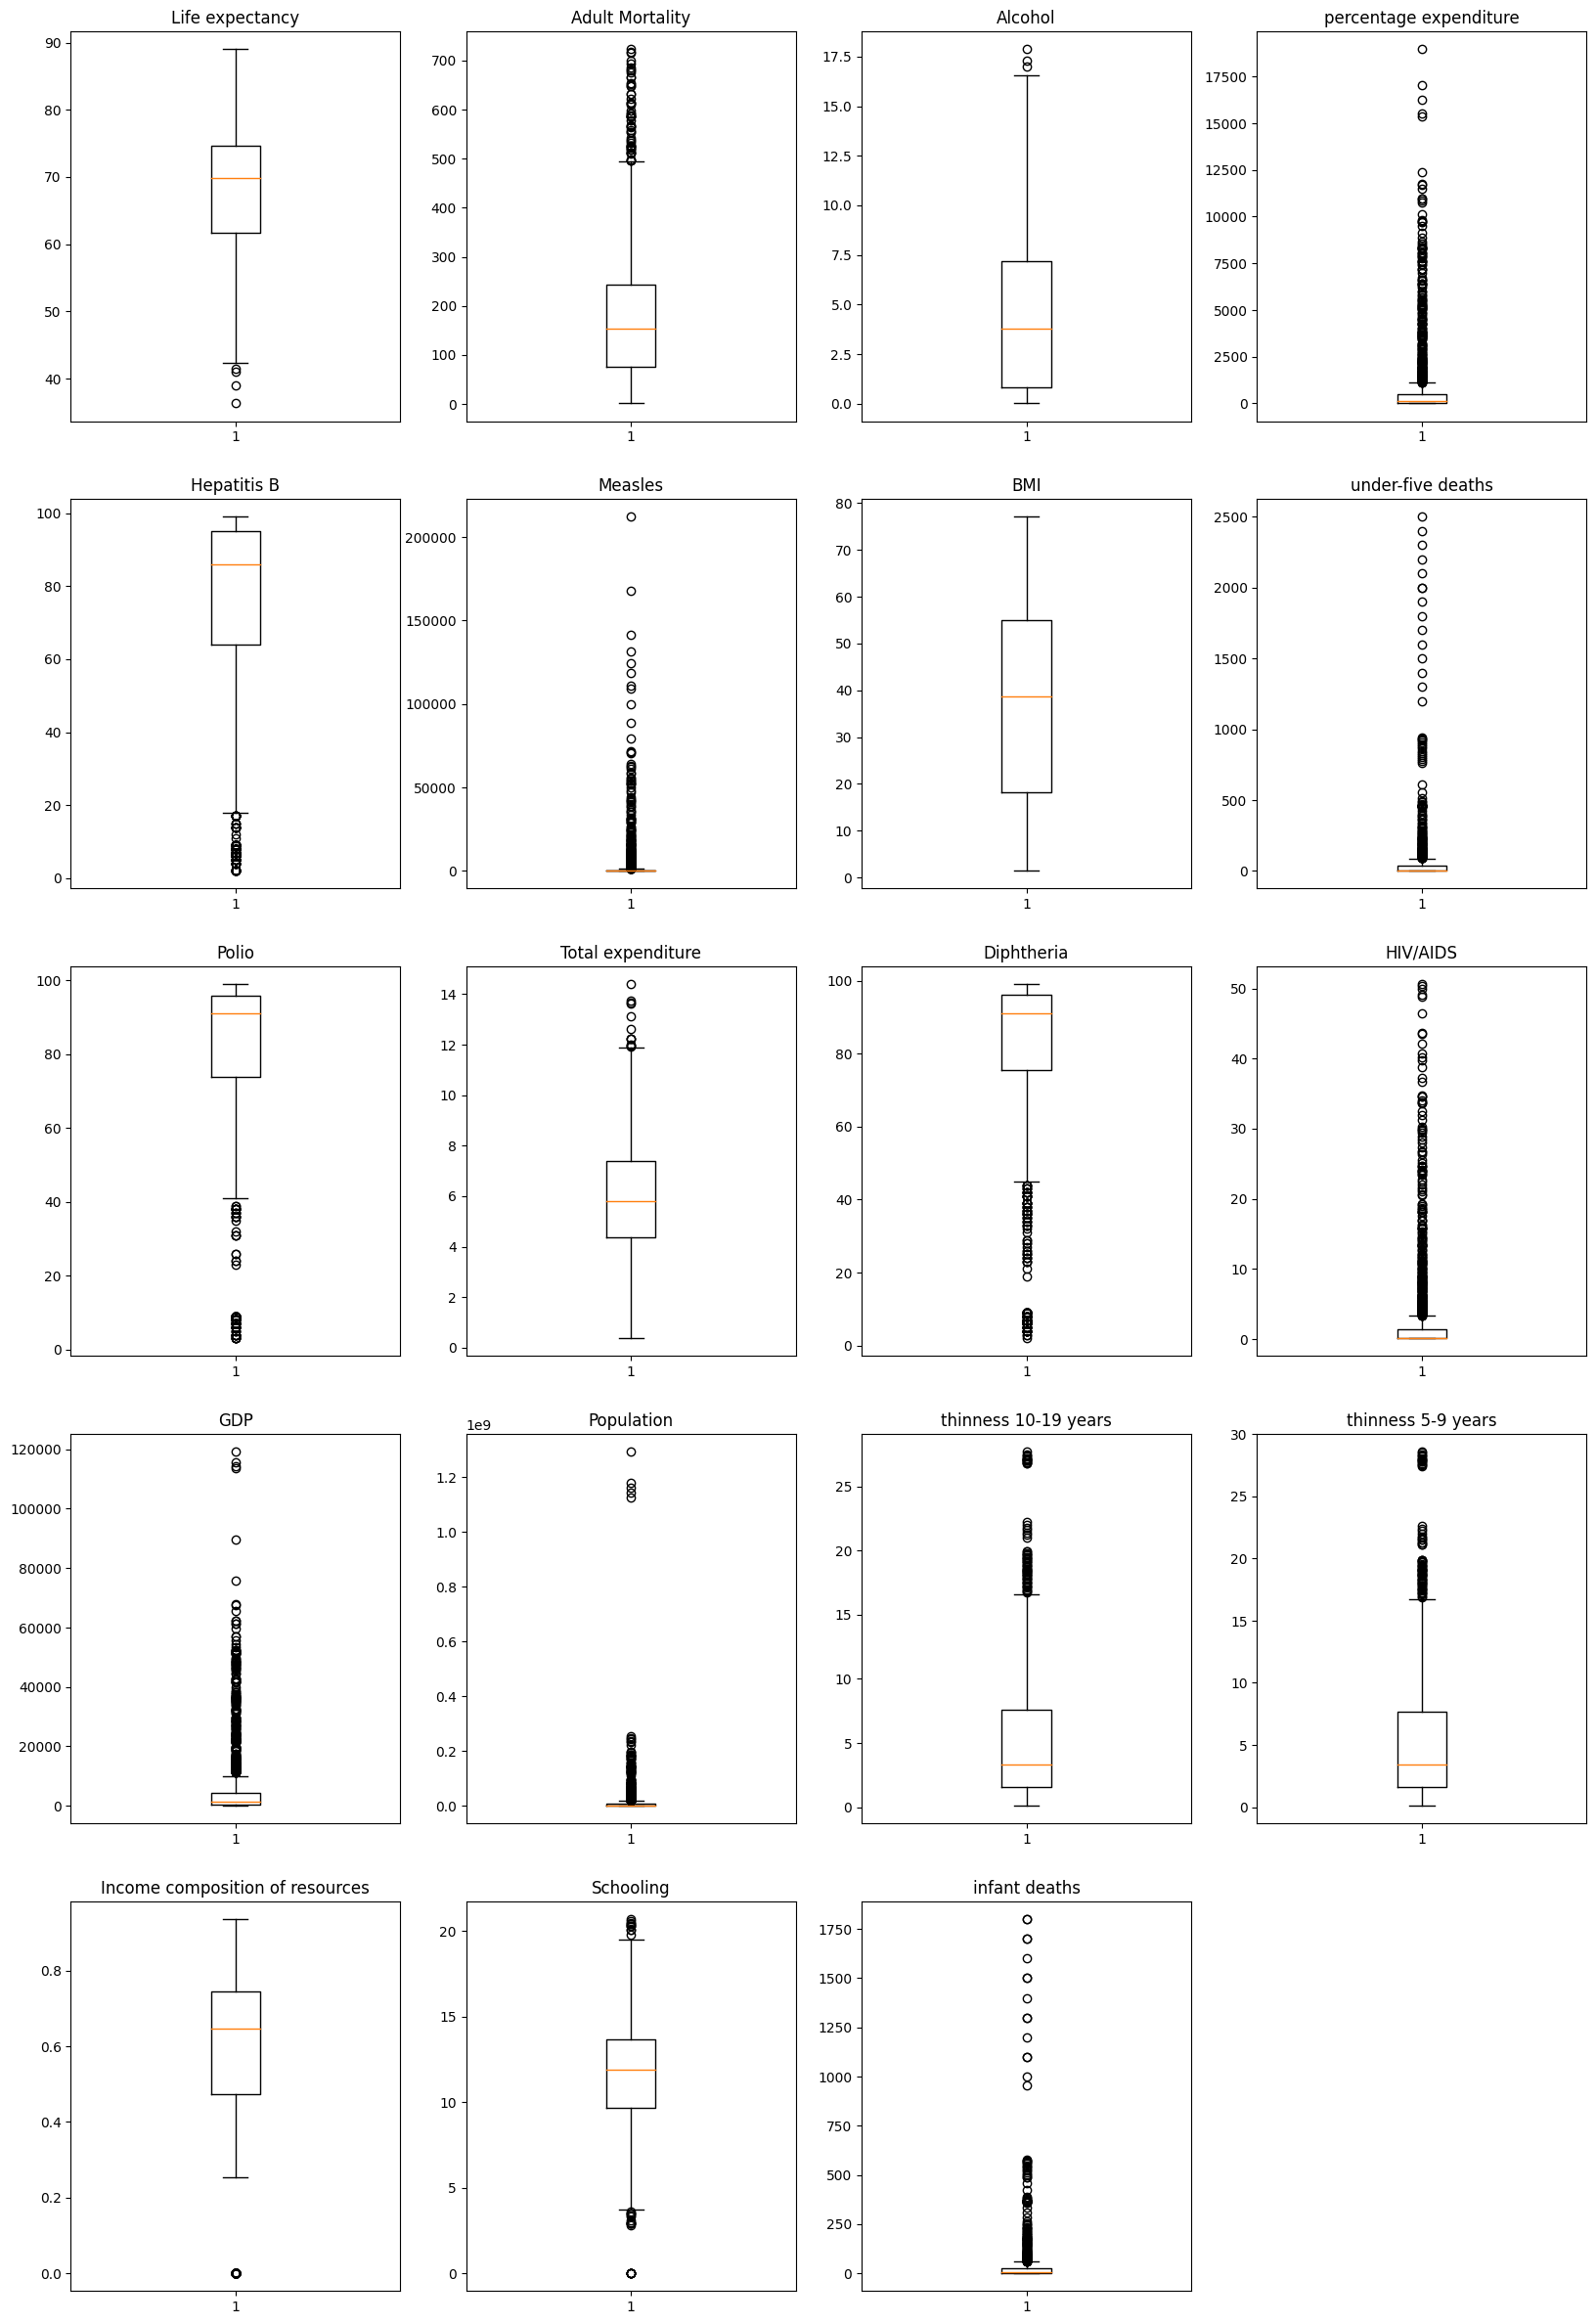

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.title(variable)

plt.show()
#outliers are the values that are 1.5*IQR distance above q3 or below q1

As we can see above some of the feature values have extreme outlier values like 'infant deaths','HIV','percentage expenditure' and some features like BMI has 0 outliers

In [ ]:
import numpy as np

for variable in col_dict.keys():
    q75, q25 = np.percentile(data[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and it's percentage in {} is : {} and {}".format(variable,
                                                                             len((np.where((data[variable] > max_val) | (data[variable] < min_val))[0])),
                                                                             len((np.where((data[variable] > max_val) | (data[variable] < min_val))[0]))*100/1987))
                                          


Number of outliers and it's percentage in Life expectancy is : 4 and 0.20130850528434827
Number of outliers and it's percentage in Adult Mortality is : 58 and 2.9189733266230498
Number of outliers and it's percentage in Alcohol is : 3 and 0.1509813789632612
Number of outliers and it's percentage in percentage expenditure is : 232 and 11.675893306492199
Number of outliers and it's percentage in Hepatitis B is : 216 and 10.870659285354806
Number of outliers and it's percentage in Measles is : 361 and 18.16809260191243
Number of outliers and it's percentage in BMI is : 0 and 0.0
Number of outliers and it's percentage in under-five deaths is : 227 and 11.424257674886764
Number of outliers and it's percentage in Polio is : 159 and 8.002013085052843
Number of outliers and it's percentage in Total expenditure is : 13 and 0.6542526421741318
Number of outliers and it's percentage in Diphtheria is : 195 and 9.813789632611979
Number of outliers and it's percentage in HIV/AIDS is : 309 and 15.5510

In [ ]:
#there are 18 columnns having outliers
from scipy.stats.mstats import winsorize
winsorized_Life_Expectancy = winsorize(data['Life expectancy'],(0.01,0))
winsorized_Adult_Mortality = winsorize(data['Adult Mortality'],(0,0.03))
winsorized_Infant_Deaths = winsorize(data['infant deaths'],(0,0.10))
winsorized_Alcohol = winsorize(data['Alcohol'],(0,0.01))
winsorized_Percentage_Exp = winsorize(data['percentage expenditure'],(0,0.12))
winsorized_HepatitisB = winsorize(data['Hepatitis B'],(0.11,0))
winsorized_Measles = winsorize(data['Measles'],(0,0.19))
winsorized_Under_Five_Deaths = winsorize(data['under-five deaths'],(0,0.12))
winsorized_Polio = winsorize(data['Polio'],(0.09,0))
winsorized_Tot_Exp = winsorize(data['Total expenditure'],(0,0.01))
winsorized_Diphtheria = winsorize(data['Diphtheria'],(0.10,0))
winsorized_HIV = winsorize(data['HIV/AIDS'],(0,0.16))
winsorized_GDP = winsorize(data['GDP'],(0,0.13))
winsorized_Population = winsorize(data['Population'],(0,0.14))
winsorized_thinness_10_19_years = winsorize(data['thinness 10-19 years'],(0,0.04))
winsorized_thinness_5_9_years = winsorize(data['thinness 5-9 years'],(0,0.04))
winsorized_Income_Comp_Of_Resources = winsorize(data['Income composition of resources'],(0.05,0))
winsorized_Schooling = winsorize(data['Schooling'],(0.02,0.01))

The winsorize function takes two main parameters: data and limits. data is the input column that we want to winsorize, and limits is a tuple that specifies the limits for the winsorizing. The first element of the tuple specifies the lower limit, and the second element specifies the upper limit. These limits are expressed as percentiles, so a limit of 0.01 means that the function will replace the lowest 1% of values with the 1st percentile value, and a limit of 0.10 means that the function will replace the highest 10% of values with the 90th percentile value.

In [ ]:
winsorized_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_Measles,winsorized_Infant_Deaths,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,
            winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_10_19_years,winsorized_thinness_5_9_years,
            winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in winsorized_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization in  : {} ".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 
Number of outliers after winsorization in  : 0 


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:
#adding 18 columns with no outliers to the dataframe
data['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
data['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
data['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
data['winsorized_Alcohol'] = winsorized_Alcohol
data['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
data['winsorized_HepatitisB'] = winsorized_HepatitisB
data['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
data['winsorized_Polio'] = winsorized_Polio
data['winsorized_Tot_Exp'] = winsorized_Tot_Exp
data['winsorized_Diphtheria'] = winsorized_Diphtheria
data['winsorized_HIV'] = winsorized_HIV
data['winsorized_GDP'] = winsorized_GDP
data['winsorized_Population'] = winsorized_Population
data['winsorized_thinness_10_19_years'] = winsorized_thinness_10_19_years
data['winsorized_thinness_5_9_years'] = winsorized_thinness_5_9_years
data['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
data['winsorized_Schooling'] = winsorized_Schooling
data['winsorized_Measles'] = winsorized_Measles

In [ ]:
data.shape
#more 18 columns are added

(1987, 40)

#*EDA*

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_10_19_years', 'winsorized_thinness_5_9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles'],
      dtype='object')

**HISTOGRAM PLOT**

<Axes: xlabel='Life expectancy', ylabel='Count'>

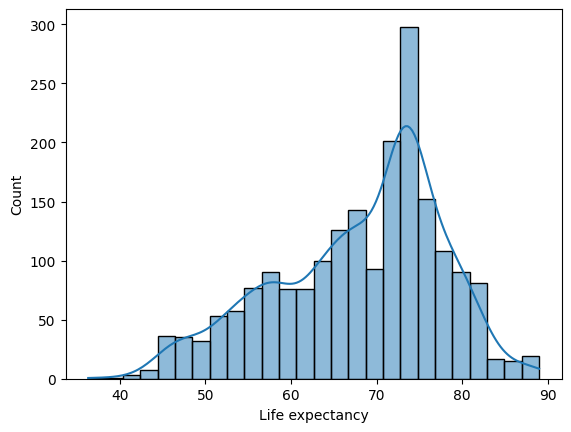

In [ ]:
sns.histplot(data['Life expectancy'],kde=True)
#Seaborn will create a histogram plot of the "Life expectancy" column from the "data" DataFrame, 
#and include a KDE plot on top of it if kde=True. 
#The resulting plot will show the distribution of life expectancy in the dataset, 
#with the x-axis representing the values of the life expectancy variable and the y-axis representing 
#the frequency or density of those values.

**CORRELATION MATRIX**

In [ ]:
num_cols=data[['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']]
#making a list of all numerical value colums (excluding country names and year columns)

In [ ]:
num_cols.corr()
#printing correlation ,matrix of columns with respect to each other

<ipython-input-28-c1b8e571dc2f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_cols.corr()


Year  Life expectancy  Adult Mortality  \
Year                             1.000000         0.171485        -0.072108   
Life expectancy                  0.171485         1.000000        -0.660529   
Adult Mortality                 -0.072108        -0.660529         1.000000   
infant deaths                   -0.037601        -0.160922         0.038304   
Alcohol                         -0.046859         0.392617        -0.181469   
percentage expenditure           0.089096         0.413683        -0.242438   
Hepatitis B                      0.247259         0.249625        -0.103382   
Measles                         -0.099554        -0.138133        -0.007269   
BMI                              0.096059         0.599572        -0.372519   
under-five deaths               -0.042479        -0.187438         0.052865   
Polio                            0.117642         0.415188        -0.208006   
Total expenditure                0.074139         0.199288        -0.096727   
Diphtheria                       0.166006         0.442943        -0.210136   
HIV/AIDS                        -0.142581        -0.576373         0.536273   
GDP                              0.119355         0.443612        -0.256955   
Population                       0.022775        -0.010840        -0.022403   
thinness 10-19 years            -0.047477        -0.458724         0.278842   
thinness 5-9 years              -0.053483        -0.450095         0.284581   
Income composition of resources  0.242900         0.726753        -0.411010   
Schooling                        0.225046         0.744703        -0.404160   

                                 infant deaths   Alcohol  \
Year                                 -0.037601 -0.046859   
Life expectancy                      -0.160922  0.392617   
Adult Mortality                       0.038304 -0.181469   
infant deaths                         1.000000 -0.104406   
Alcohol                              -0.104406  1.000000   
percentage expenditure               -0.089772  0.430835   
Hepatitis B                          -0.216949  0.106383   
Measles                               0.509747 -0.029252   
BMI                                  -0.227769  0.379327   
under-five deaths                     0.996729 -0.099713   
Polio                                -0.152153  0.239854   
Total expenditure                    -0.147961  0.227108   
Diphtheria                           -0.156470  0.245454   
HIV/AIDS                              0.001739 -0.033756   
GDP                                  -0.097720  0.458112   
Population                            0.562805 -0.025556   
thinness 10-19 years                  0.481580 -0.398731   
thinness 5-9 years                    0.487596 -0.387087   
Income composition of resources      -0.137175  0.532173   
Schooling                            -0.195815  0.590261   

                                 percentage expenditure  Hepatitis B  \
Year                                           0.089096     0.247259   
Life expectancy                                0.413683     0.249625   
Adult Mortality                               -0.242438    -0.103382   
infant deaths                                 -0.089772    -0.216949   
Alcohol                                        0.430835     0.106383   
percentage expenditure                         1.000000    -0.011530   
Hepatitis B                                   -0.011530     1.000000   
Measles                                       -0.069316    -0.142059   
BMI                                            0.277788     0.198627   
under-five deaths                             -0.092480    -0.226512   
Polio                                          0.162606     0.451299   
Total expenditure                              0.217103     0.130435   
Diphtheria                                     0.168910     0.552732   
HIV/AIDS                                      -0.109680    -0.104034   
GDP                                 


 The correlation matrix is a table that shows the correlation coefficients between all pairs of variables in the DataFrame. Each cell in the matrix contains a correlation coefficient that indicates the strength and direction of the linear relationship between two variables.

correlation index ranges from -1 to 1. -1 indicates strong negative correlation(inversely propotional) and 1 indicates strong positive correlation.0 indiacates no correlation between the values




**COVARIANCE ANALYSIS**

In [ ]:

num_cols=data[['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']]
#making a list of all numerical value colums (excluding country names and year columns)

covariance_matrix = num_cols.cov()

# Display the covariance matrix




<ipython-input-29-cab262104a6b>:8: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = num_cols.cov()


In [ ]:
print("Covariance Matrix:")
covariance_matrix

Covariance Matrix:


Year  Life expectancy  \
Year                             1.868960e+01     7.195898e+00   
Life expectancy                  7.195898e+00     9.421423e+01   
Adult Mortality                 -4.102940e+01    -8.438432e+02   
infant deaths                   -2.256007e+01    -2.167779e+02   
Alcohol                         -8.055995e-01     1.515491e+01   
percentage expenditure           6.785530e+02     7.073757e+03   
Hepatitis B                      3.102913e+01     7.033388e+01   
Measles                         -5.208730e+03    -1.622659e+04   
BMI                              8.196002e+00     1.148581e+02   
under-five deaths               -3.469588e+01    -3.437351e+02   
Polio                            1.239081e+01     9.818407e+01   
Total expenditure                7.331631e-01     4.424797e+00   
Diphtheria                       1.754715e+01     1.051205e+02   
HIV/AIDS                        -3.701537e+00    -3.359565e+01   
GDP                              5.923972e+03     4.943497e+04   
Population                       6.390244e+06    -6.828428e+06   
thinness 10-19 years            -9.749749e-01    -2.115034e+01   
thinness 5-9 years              -1.120101e+00    -2.116413e+01   
Income composition of resources  2.163467e-01     1.453340e+00   
Schooling                        3.125917e+00     2.322455e+01   

                                 Adult Mortality  infant deaths       Alcohol  \
Year                               -4.102940e+01  -2.256007e+01 -8.055995e-01   
Life expectancy                    -8.438432e+02  -2.167779e+02  1.515491e+01   
Adult Mortality                     1.732302e+04   6.996783e+02 -9.498201e+01   
infant deaths                       6.996783e+02   1.926125e+04 -5.762259e+01   
Alcohol                            -9.498201e+01  -5.762259e+01  1.581441e+01   
percentage expenditure             -5.621291e+04  -2.194861e+04  3.018297e+03   
Hepatitis B                        -3.949796e+02  -8.740139e+02  1.228057e+01   
Measles                            -1.157853e+04   8.561852e+05 -1.407825e+03   
BMI                                -9.676598e+02  -6.238770e+02  2.977159e+01   
under-five deaths                   1.314575e+03   2.613531e+04 -7.491793e+01   
Polio                              -6.669997e+02  -5.144687e+02  2.323868e+01   
Total expenditure                  -2.912147e+01  -4.697262e+01  2.065925e+00   
Diphtheria                         -6.762291e+02  -5.309527e+02  2.386593e+01   
HIV/AIDS                            4.238563e+02   1.449221e+00 -8.061102e-01   
GDP                                -3.882762e+05  -1.557040e+05  2.091562e+04   
Population                         -1.913714e+08   5.069351e+09 -6.595735e+06   
thinness 10-19 years                1.743318e+02   3.174812e+02 -7.532060e+00   
thinness 5-9 years                  1.814499e+02   3.278242e+02 -7.457161e+00   
Income composition of resources    -1.114516e+01  -3.922303e+00  4.360154e-01   
Schooling                          -1.709114e+02  -8.731616e+01  7.541825e+00   

                                 percentage expenditure   Hepatitis B  \
Year                                       6.785530e+02  3.102913e+01   
Life expectancy                            7.073757e+03  7.033388e+01   
Adult Mortality                           -5.621291e+04 -3.949796e+02   
infant deaths                             -2.194861e+04 -8.740139e+02   
Alcohol                                    3.018297e+03  1.228057e+01   
percentage expenditure                     3.103478e+06 -5.896353e+02   
Hepatitis B                               -5.896353e+02  8.426289e+02   
Measles                                   -1.477846e+06 -4.990650e+04   
BMI                                        9.658276e+03  1.137939e+02   
under-five deaths                         -3.078088e+04 -1.242275e+03   
Polio                                      6.979064e+03  3.191683e+02   
Total expenditure                          8.748735e+02  8.661012e+00   
Dip

**PAIR-PLOT**

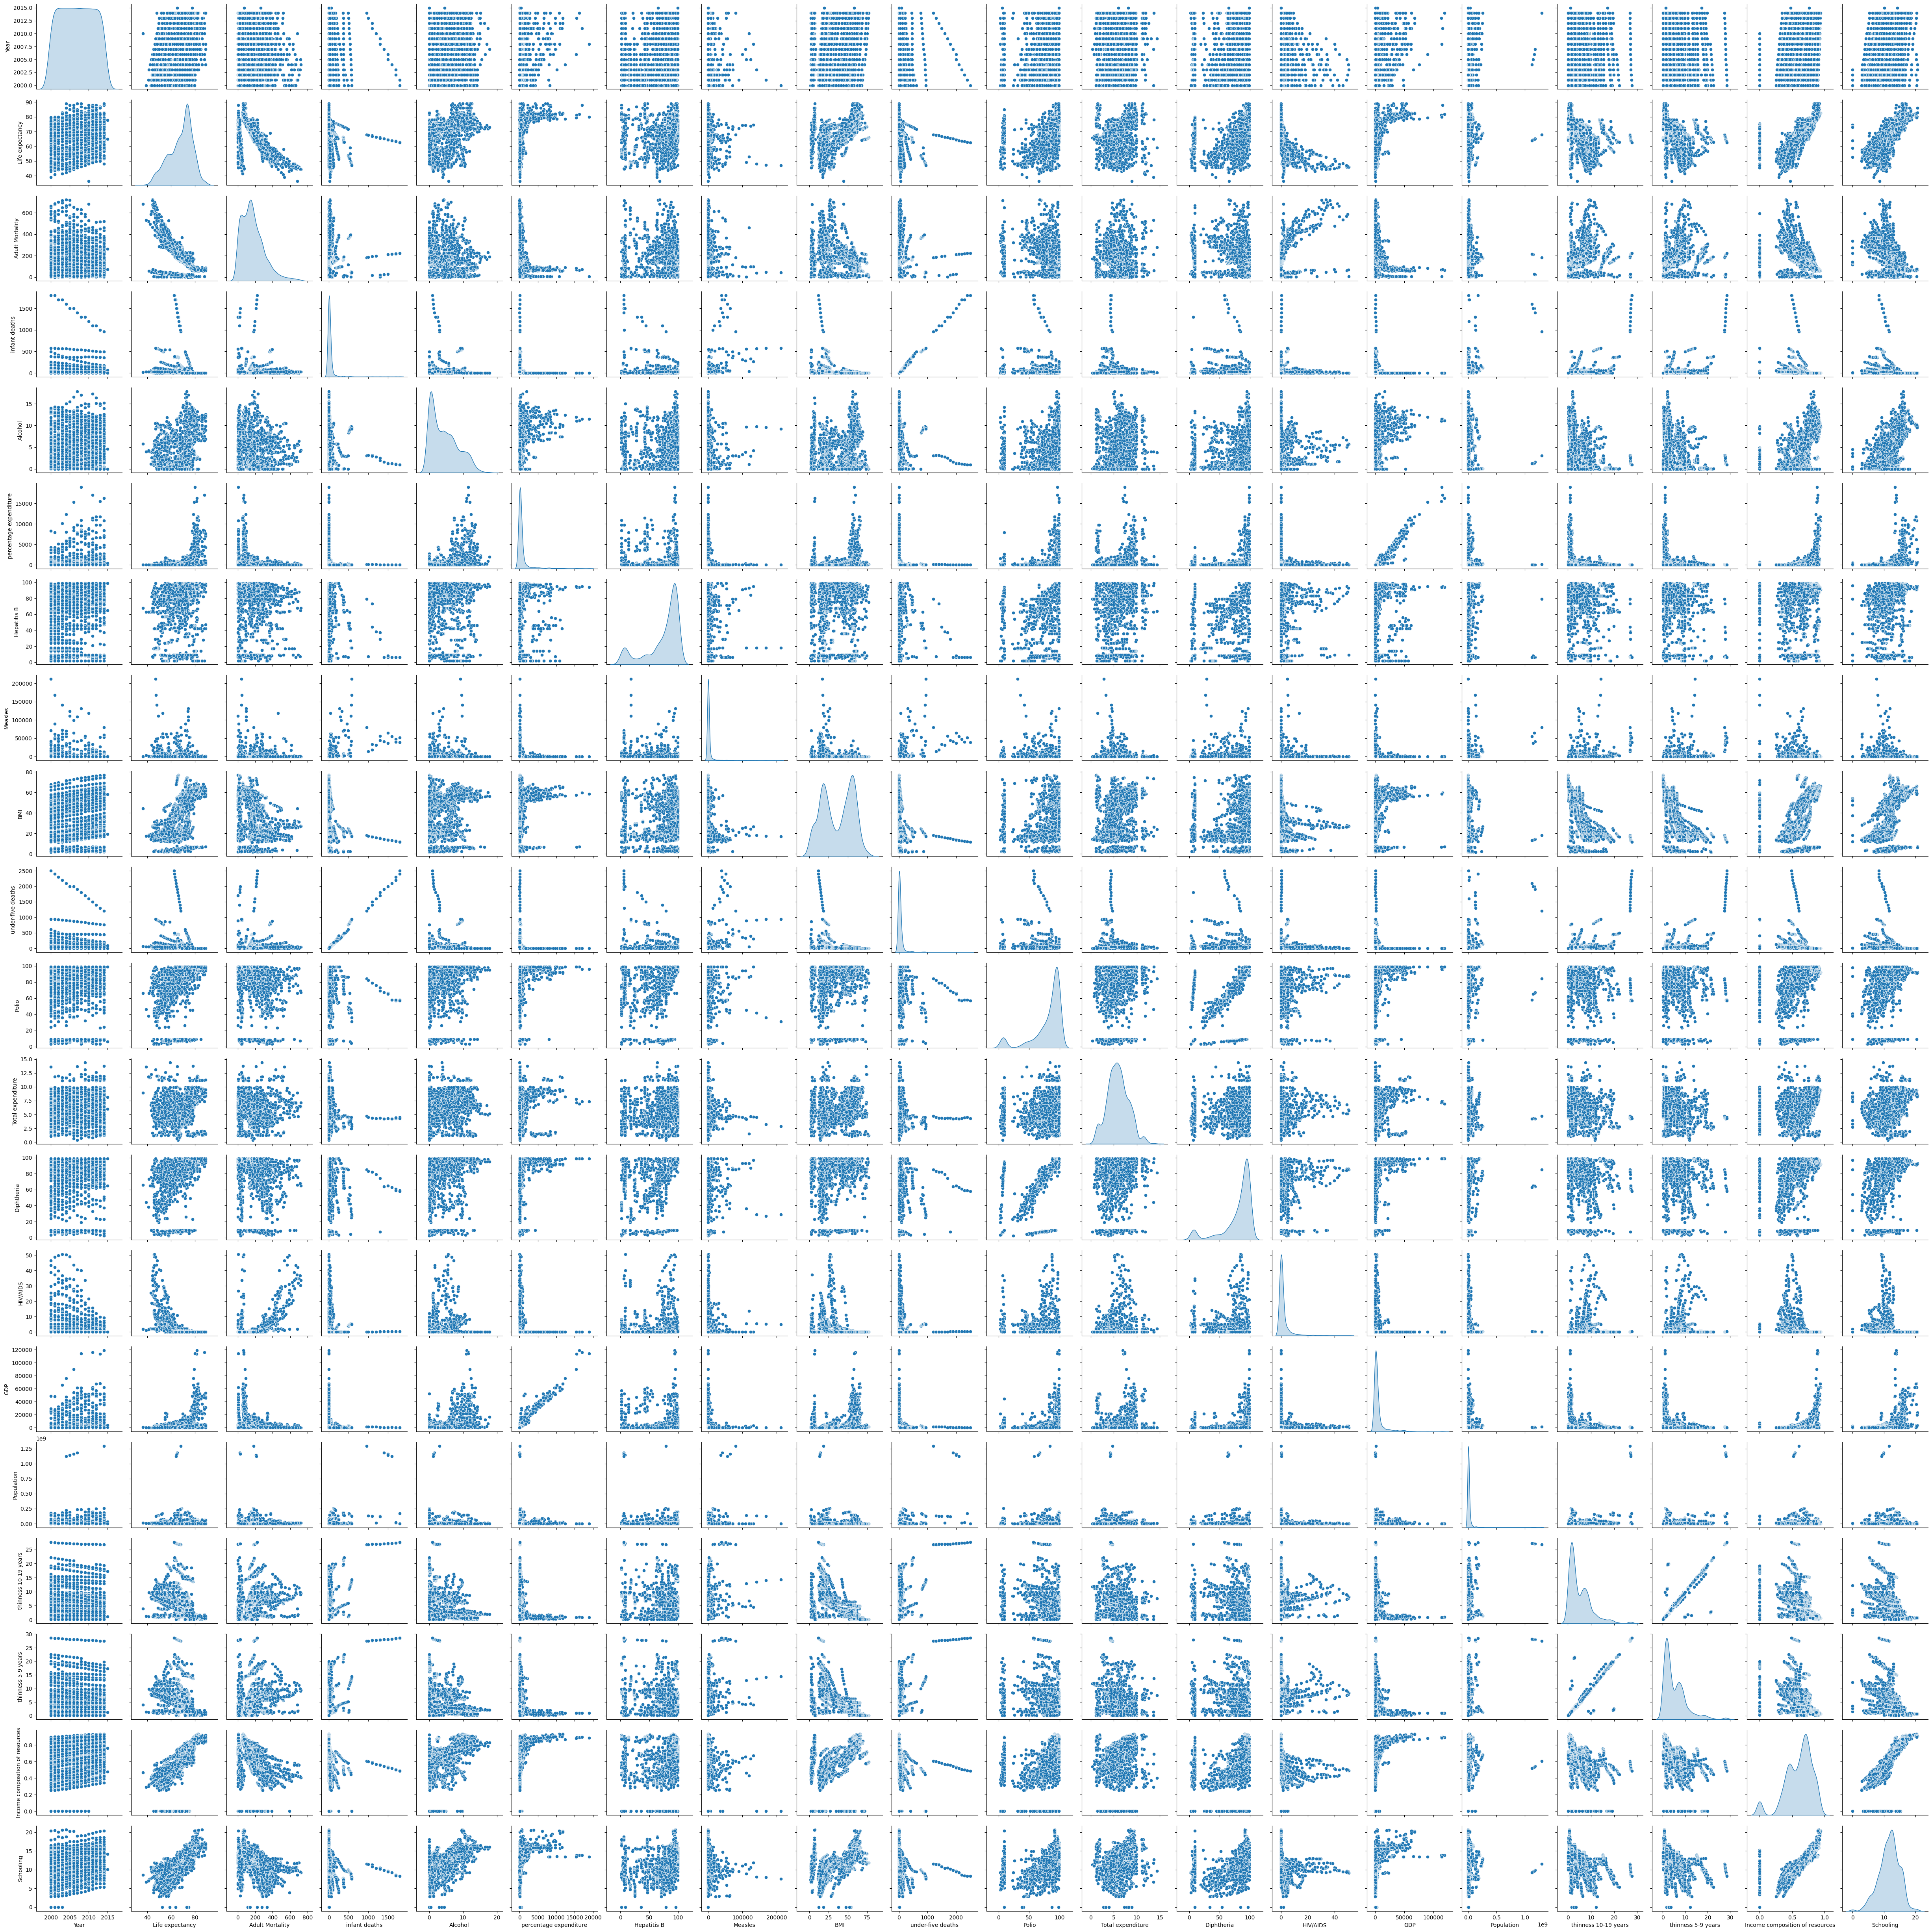

In [ ]:
sns.pairplot(num_cols,diag_kind='kde')



The pairplot() function creates a grid of scatterplots and histograms of all the pairwise combinations of the variables in the disease_cols dataframe. The scatterplots show the relationship between two variables, while the histograms show the distribution of each variable individually.

The diag_kind='kde' argument in the function call specifies that the diagonal of the plot grid should be filled with kernel density estimate (KDE) plots for each variable. This allows us to see the distribution of each variable more clearly.



**HISTOGRAM FOR EACH COLUMN**

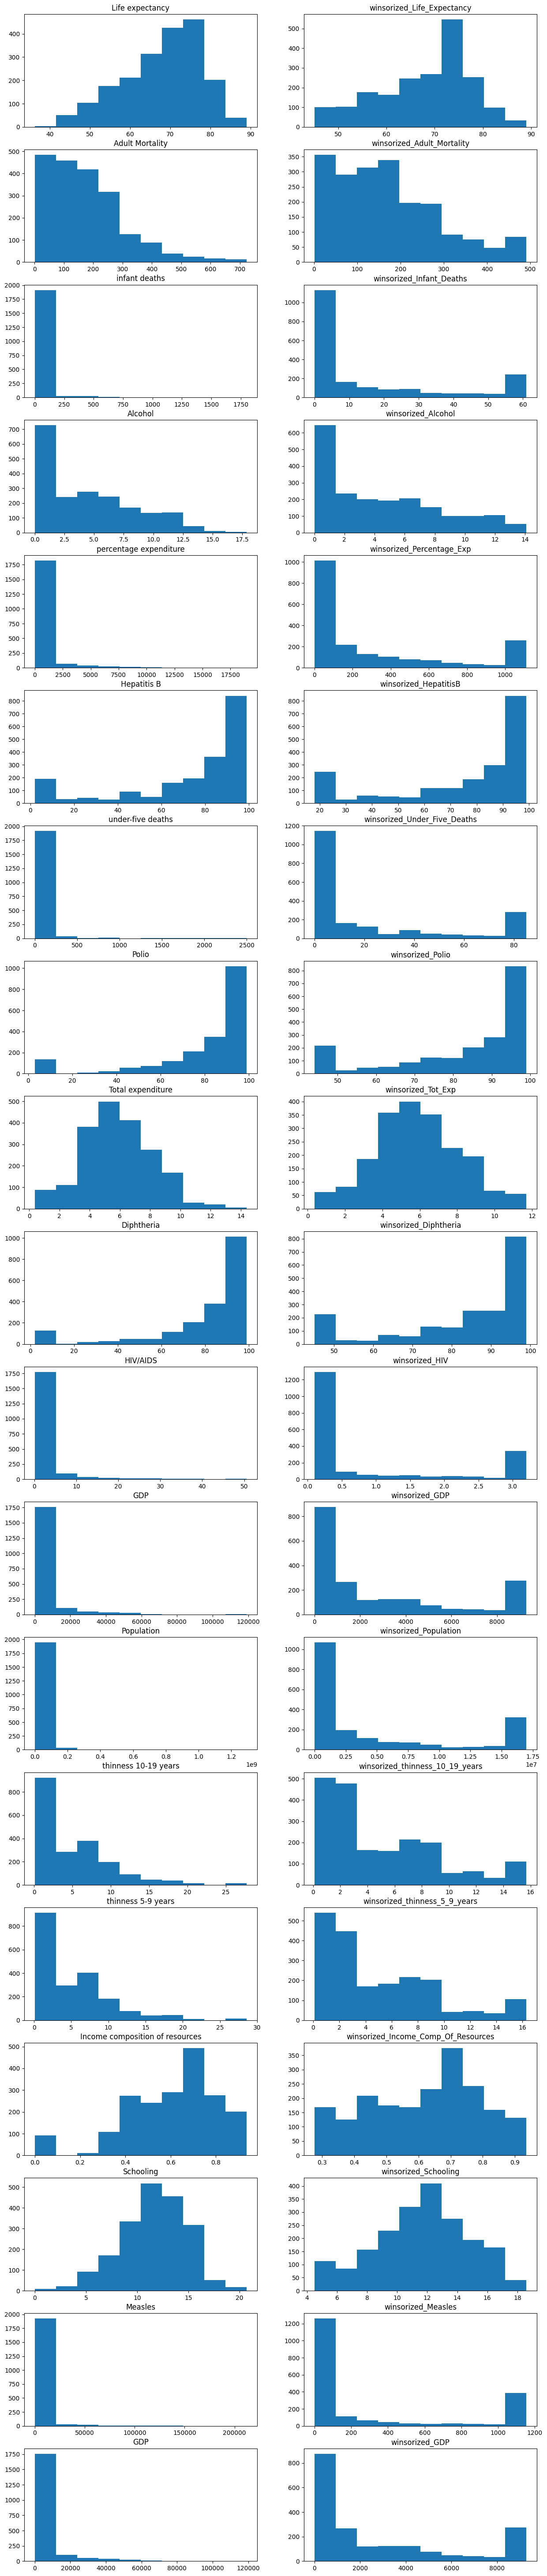

In [ ]:
col = ['Life expectancy','winsorized_Life_Expectancy','Adult Mortality','winsorized_Adult_Mortality','infant deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','percentage expenditure','winsorized_Percentage_Exp','Hepatitis B',
         'winsorized_HepatitisB','under-five deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Total expenditure',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness 10-19 years','winsorized_thinness_10_19_years','thinness 5-9 years',
         'winsorized_thinness_5_9_years','Income composition of resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling','Measles','winsorized_Measles','GDP','winsorized_GDP']

plt.figure(figsize=(15,75))

for i in range(len(col)):
    plt.subplot(19,2,i+1)
    plt.hist(data[col[i]])
    plt.title(col[i])

plt.show()
#plotting histogram for each column

In [ ]:

data.describe(include= 'O') #include specifies the list of datatype to be included .

Country      Status
count          1987        1987
unique          133           2
top     Afghanistan  Developing
freq             16        1702

In [ ]:
round(data[['Status','winsorized_Life_Expectancy']].groupby(['Status']).mean(),2)
#printing dependency on 'status' vs avg life expectancy

winsorized_Life_Expectancy
Status                                
Developed                        78.83
Developing                       66.19

**BAR PLOT**

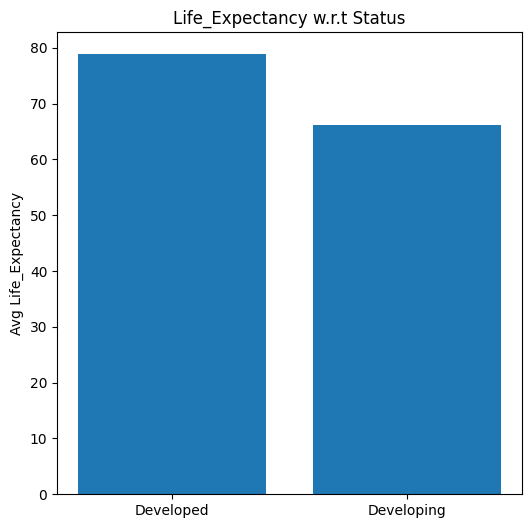

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(data.groupby('Status')['Status'].count().index,data.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.ylabel("Avg Life_Expectancy")
plt.title("Life_Expectancy w.r.t Status")
plt.show()
#plotting avg life expecatncy on developed vs developing nations

**BAR PLOT FOR EACH COUNTRY**

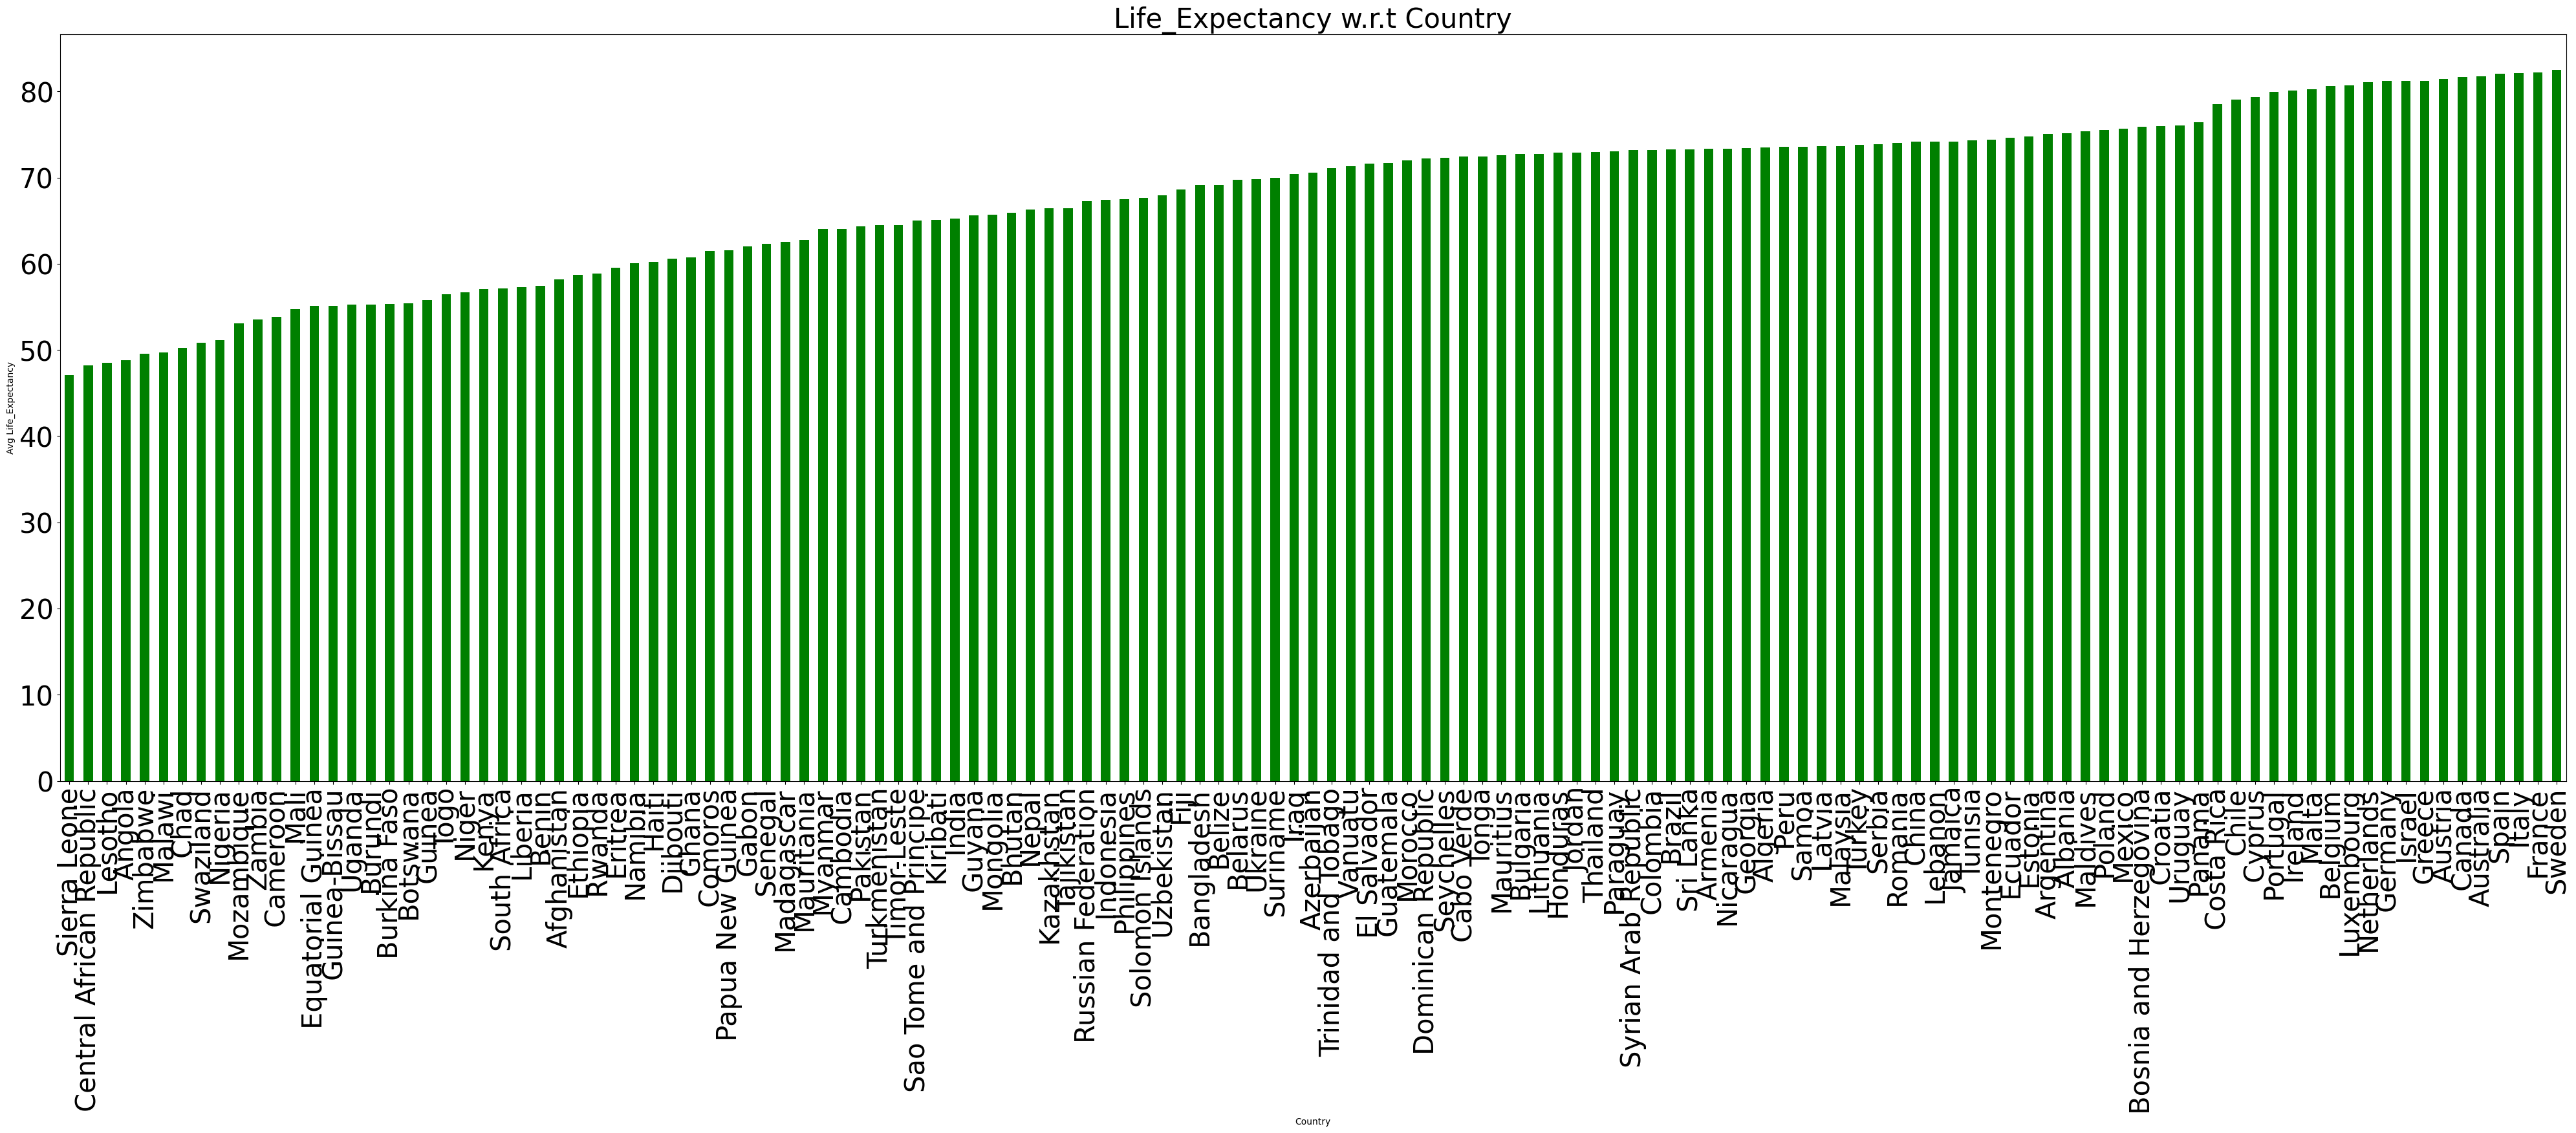

In [ ]:
country_data = data.groupby('Country')['winsorized_Life_Expectancy'].mean().sort_values(ascending=True)
country_data.plot(kind='bar' ,figsize=(50,15),fontsize=30,color='g')
plt.title("Life_Expectancy w.r.t Country",fontsize=30)
plt.xlabel("Country",fontsize=10)
plt.ylabel("Avg Life_Expectancy")
plt.show()

**BAR PLOT OF LIFE EXPECTANCY OVER THE YEARS**

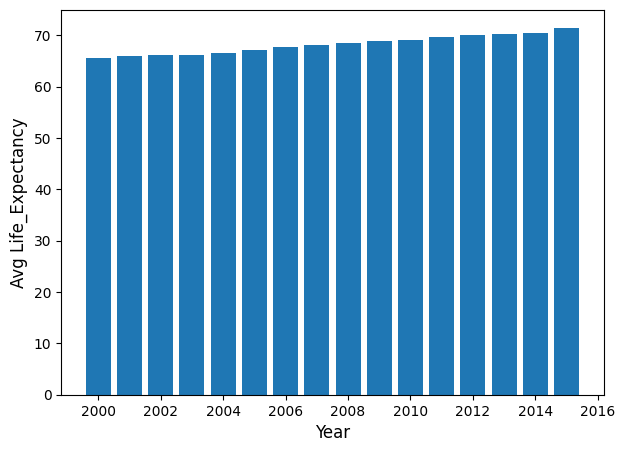

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(data.groupby('Year')['Year'].count().index,data.groupby('Year')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.show()


**CORRELATION VALUES**

In [ ]:
cor_matrix=data.corr()
print(cor_matrix['winsorized_Life_Expectancy'].sort_values(ascending=False))
#print the dependency of all other feature values on 'life dependency' using correlation matrix in descending order

winsorized_Life_Expectancy             1.000000
Life expectancy                        0.999564
winsorized_Income_Comp_Of_Resources    0.823222
winsorized_Schooling                   0.762333
Schooling                              0.746461
Income composition of resources        0.728270
BMI                                    0.601434
winsorized_Percentage_Exp              0.557117
winsorized_GDP                         0.551722
winsorized_Diphtheria                  0.535687
winsorized_Polio                       0.516167
GDP                                    0.445022
Diphtheria                             0.443489
Polio                                  0.415868
percentage expenditure                 0.415074
winsorized_Alcohol                     0.396073
Alcohol                                0.394380
winsorized_HepatitisB                  0.268086
Hepatitis B                            0.250284
winsorized_Tot_Exp                     0.208400
Total expenditure                      0

<ipython-input-38-34a045bc7ff9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix=data.corr()


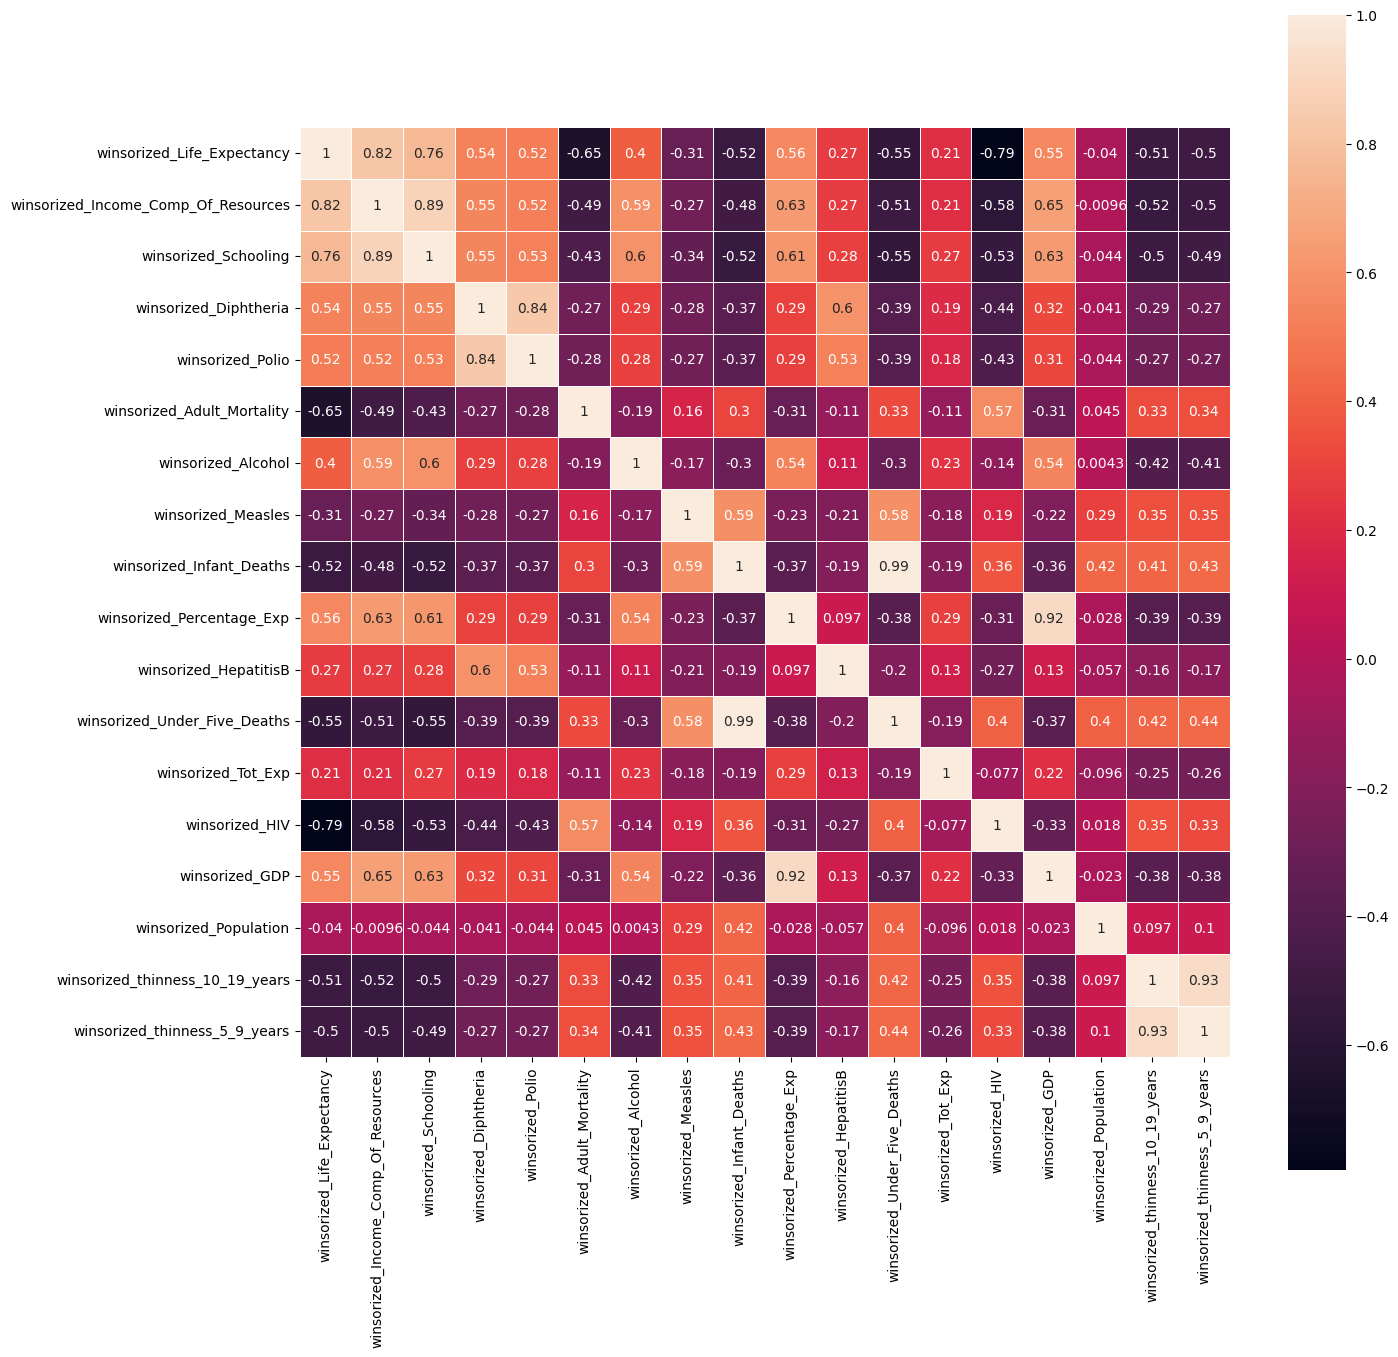

In [ ]:
import seaborn as sns
#Importing the Seaborn library and assigning it the alias sns.
from pandas.plotting import scatter_matrix

attributes= ['winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources','winsorized_Schooling'
,'winsorized_Diphtheria','winsorized_Polio','winsorized_Adult_Mortality','winsorized_Alcohol','winsorized_Measles','winsorized_Infant_Deaths',
            'winsorized_Percentage_Exp','winsorized_HepatitisB','winsorized_Under_Five_Deaths','winsorized_Tot_Exp',
            'winsorized_HIV','winsorized_GDP','winsorized_Population','winsorized_thinness_10_19_years','winsorized_thinness_5_9_years']
cormat=data[attributes].corr()
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.show()
#generates a heatmap visualization that can be used to explore the correlation between the selected attributes from the dataframe.

In [ ]:
#Since 'status' is a categorical feature, we have to find the correlation with Life expectancy
import scipy.stats as stats
stats.ttest_ind(data.loc[data['Status']=='Developed','winsorized_Life_Expectancy'],data.loc[data['Status']=='Developing','winsorized_Life_Expectancy'])

Ttest_indResult(statistic=23.02232052151534, pvalue=3.793119218299665e-104)

In [ ]:
data.columns


Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_10_19_years', 'winsorized_thinness_5_9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles'],
      dtype='object')

creating a new dataframe with only winorised columns

In [ ]:
n_data=pd.DataFrame(data=data,columns=['Country', 'Year', 'Status', 
        'BMI', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_10_19_years', 'winsorized_thinness_5_9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles',   
       'winsorized_Life_Expectancy'])

In [ ]:
n_data.head()

Country  Year      Status   BMI  winsorized_Adult_Mortality  \
0  Afghanistan  2015  Developing  19.1                       263.0   
1  Afghanistan  2014  Developing  18.6                       271.0   
2  Afghanistan  2013  Developing  18.1                       268.0   
3  Afghanistan  2012  Developing  17.6                       272.0   
4  Afghanistan  2011  Developing  17.2                       275.0   

   winsorized_Infant_Deaths  winsorized_Alcohol  winsorized_Percentage_Exp  \
0                        61                0.01                  71.279624   
1                        61                0.01                  73.523582   
2                        61                0.01                  73.219243   
3                        61                0.01                  78.184215   
4                        61                0.01                   7.097109   

   winsorized_HepatitisB  winsorized_Under_Five_Deaths  ...  \
0                   65.0                            83  ...   
1                   62.0                            85  ...   
2                   64.0                            85  ...   
3                   67.0                            85  ...   
4                   68.0                            85  ...   

   winsorized_Diphtheria  winsorized_HIV  winsorized_GDP  \
0                   65.0             0.1      584.259210   
1                   62.0             0.1      612.696514   
2                   64.0             0.1      631.744976   
3                   67.0             0.1      669.959000   
4                   68.0             0.1       63.537231   

   winsorized_Population  winsorized_thinness_10_19_years  \
0             16993354.0                             15.7   
1               327582.0                             15.7   
2             16993354.0                             15.7   
3              3696958.0                             15.7   
4              2978599.0                             15.7   

   winsorized_thinness_5_9_years  winsorized_Income_Comp_Of_Resources  \
0                           16.3                                0.479   
1                           16.3                                0.476   
2                           16.3                                0.470   
3                           16.3                                0.463   
4                           16.3                                0.454   

   winsorized_Schooling  winsorized_Measles  winsorized_Life_Expectancy  
0                  10.1                1154                        65.0  
1                  10.0                 492                        59.9  
2                   9.9                 430                        59.9  
3                   9.8                1154                        59.5  
4                   9.5                1154                        59.2  

[5 rows x 22 columns]

In [ ]:
n_data.rename(columns={  
             'winsorized_Adult_Mortality':'Adult_Mortality',
       'winsorized_Infant_Deaths' :'Infant_Deaths',
       'winsorized_Alcohol':'Alcohol',
       'winsorized_Percentage_Exp':'Percentage_Expenditure',
       'winsorized_HepatitisB':'Hepatitis_B',
       'winsorized_Under_Five_Deaths':'Under_Five_Deaths',
       'winsorized_Polio':'Polio',
       'winsorized_Tot_Exp':'Total_Expenditure',
       'winsorized_Diphtheria':'Diphtheria',
       'winsorized_HIV':'HIV/AIDS',
       'winsorized_GDP':'GDP',
       'winsorized_Population':'Population',
       'winsorized_thinness_10_19_years':'Thinness_10_19_years',
       'winsorized_thinness_5_9_years':'Thinness_5_9_years',
       'winsorized_Income_Comp_Of_Resources':'Income_Composition_of_Resources',
       'winsorized_Schooling':'Schooling',
       'winsorized_Measles':'Measles',
       'winsorized_Life_Expectancy':'Life_Expectancy' } ,inplace=True)
#renaming the columns of new data

In [ ]:
n_data.columns

Index(['Country', 'Year', 'Status', 'BMI', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Under_Five_Deaths',
       'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'Thinness_10_19_years', 'Thinness_5_9_years',
       'Income_Composition_of_Resources', 'Schooling', 'Measles',
       'Life_Expectancy'],
      dtype='object')

In [ ]:
n_data.head()

Country  Year      Status   BMI  Adult_Mortality  Infant_Deaths  \
0  Afghanistan  2015  Developing  19.1            263.0             61   
1  Afghanistan  2014  Developing  18.6            271.0             61   
2  Afghanistan  2013  Developing  18.1            268.0             61   
3  Afghanistan  2012  Developing  17.6            272.0             61   
4  Afghanistan  2011  Developing  17.2            275.0             61   

   Alcohol  Percentage_Expenditure  Hepatitis_B  Under_Five_Deaths  ...  \
0     0.01               71.279624         65.0                 83  ...   
1     0.01               73.523582         62.0                 85  ...   
2     0.01               73.219243         64.0                 85  ...   
3     0.01               78.184215         67.0                 85  ...   
4     0.01                7.097109         68.0                 85  ...   

   Diphtheria  HIV/AIDS         GDP  Population  Thinness_10_19_years  \
0        65.0       0.1  584.259210  16993354.0                  15.7   
1        62.0       0.1  612.696514    327582.0                  15.7   
2        64.0       0.1  631.744976  16993354.0                  15.7   
3        67.0       0.1  669.959000   3696958.0                  15.7   
4        68.0       0.1   63.537231   2978599.0                  15.7   

   Thinness_5_9_years  Income_Composition_of_Resources  Schooling  Measles  \
0                16.3                            0.479       10.1     1154   
1                16.3                            0.476       10.0      492   
2                16.3                            0.470        9.9      430   
3                16.3                            0.463        9.8     1154   
4                16.3                            0.454        9.5     1154   

   Life_Expectancy  
0             65.0  
1             59.9  
2             59.9  
3             59.5  
4             59.2  

[5 rows x 22 columns]

In [ ]:
n_data.columns

Index(['Country', 'Year', 'Status', 'BMI', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Under_Five_Deaths',
       'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'Thinness_10_19_years', 'Thinness_5_9_years',
       'Income_Composition_of_Resources', 'Schooling', 'Measles',
       'Life_Expectancy'],
      dtype='object')

**seperating features and label value**

In [ ]:
X = n_data.drop('Life_Expectancy', axis=1) # asxis=1 if for specifying column 
Y = pd.DataFrame(data=n_data,columns=['Life_Expectancy'])
#we seperate feature values to X dataframe and label values to Y dataframe

In [ ]:
Y.head()

Life_Expectancy
0             65.0
1             59.9
2             59.9
3             59.5
4             59.2

In [ ]:
X.head()

Country  Year      Status   BMI  Adult_Mortality  Infant_Deaths  \
0  Afghanistan  2015  Developing  19.1            263.0             61   
1  Afghanistan  2014  Developing  18.6            271.0             61   
2  Afghanistan  2013  Developing  18.1            268.0             61   
3  Afghanistan  2012  Developing  17.6            272.0             61   
4  Afghanistan  2011  Developing  17.2            275.0             61   

   Alcohol  Percentage_Expenditure  Hepatitis_B  Under_Five_Deaths  ...  \
0     0.01               71.279624         65.0                 83  ...   
1     0.01               73.523582         62.0                 85  ...   
2     0.01               73.219243         64.0                 85  ...   
3     0.01               78.184215         67.0                 85  ...   
4     0.01                7.097109         68.0                 85  ...   

   Total_Expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  16993354.0   
1               8.18        62.0       0.1  612.696514    327582.0   
2               8.13        64.0       0.1  631.744976  16993354.0   
3               8.52        67.0       0.1  669.959000   3696958.0   
4               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness_10_19_years  Thinness_5_9_years  Income_Composition_of_Resources  \
0                  15.7                16.3                            0.479   
1                  15.7                16.3                            0.476   
2                  15.7                16.3                            0.470   
3                  15.7                16.3                            0.463   
4                  15.7                16.3                            0.454   

   Schooling  Measles  
0       10.1     1154  
1       10.0      492  
2        9.9      430  
3        9.8     1154  
4        9.5     1154  

[5 rows x 21 columns]

**Splitting the dataset**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

**Training numerical and categorical features seperately**

In [ ]:
num_f = ['Year', 'BMI',
       'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure',
       'Hepatitis_B', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10_19_years',
       'Thinness_5_9_years', 'Income_Composition_of_Resources', 'Schooling',
       'Measles']
cat_f = ['Country', 'Status']
#we seperate numerical and categorical features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
#this is used to transform categorical features to one hot encoding

In [ ]:
from sklearn.impute import SimpleImputer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
   
])
#this is used to impute missing values in numerical features

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_f),
        ('num', numeric_transformer, num_f)
    ]
)

**GENERATING THE THREE MODELS**

In [ ]:
models = OrderedDict([
    ( "Linear Regressor",       Pipeline([
                                            ('preprocessor', preprocessor),
                                            ('LRegressor', LinearRegression())])  ),
    ( "Decision Tree Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('DTRegressor', DecisionTreeRegressor())])  ),
    ( "Random Forest Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('RFRegressor', RandomForestRegressor())])  ),
    
])

**TRAINIING THE THREE MODELS**

In [ ]:
accuracy_scores = {}
for (name, model) in models.items():
  model.fit(X_train,Y_train)
  accuracy_scores[name] =r2_score(model.predict(X_test), Y_test)
    
scores = OrderedDict(sorted(accuracy_scores.items()))
for (name,sc) in scores.items():
  print(name,sc)

#we get accuracy for training dataset for three models

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Decision Tree Regressor 0.9278524799577397
Linear Regressor 0.5105553499583761
Random Forest Regressor 0.9565008868015408


we see that the random forest regressor gives significantly higher accuracy than linear regressor and a bit higher accuraacy than decision regressor.hence it is the best.

**RANDOM FOREST REGRESSOR**

In [ ]:
Random_forest_Regressor = Pipeline([
     ('preprocessor', preprocessor),
     ('RFRegressor', RandomForestRegressor())
])

In [ ]:
Random_forest_Regressor.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'Status']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Year', 'BMI',
                                                   'Adult_Mortality',
                                                   'Infant_Deaths', 'Alcohol',
                                                   'Percentage_Expenditure',
                                                   'Hepatitis_B',
                                                   'Under_Five_Deaths', 'Polio',
                                                   'Total_Expenditure',
                                                   'Diphtheria', 'HIV/AIDS',
                                                   'GDP', 'Population',
                                                   'Thinness_10_19_years',
                                                   'Thinness_5_9_years',
                                                   'Income_Composition_of_Resources',
                                                   'Schooling', 'Measles'])])),
                ('RFRegressor', RandomForestRegressor())])

In [ ]:
y_pred= Random_forest_Regressor.predict(X_test)
type(y_pred)

numpy.ndarray

In [ ]:
print(y_pred)

[51.893 68.339 59.493 77.606 67.785 72.253 79.691 65.006 73.045 52.603
 53.256 48.683 72.599 59.311 81.054 72.746 72.68  73.508 74.316 77.525
 70.68  48.599 61.    71.86  69.353 60.911 72.627 62.756 66.414 74.856
 74.014 72.637 53.405 53.129 79.794 71.59  82.99  59.26  78.144 62.055
 72.243 47.206 82.555 68.644 64.88  80.81  83.262 57.862 69.833 77.074
 82.963 51.907 70.06  46.438 84.951 57.695 68.518 66.41  71.519 53.051
 66.361 68.49  80.913 59.705 78.066 69.627 65.668 74.464 61.836 57.4
 65.815 68.43  56.506 73.013 66.359 62.712 58.373 47.866 69.381 71.375
 58.926 78.386 82.286 71.742 74.262 72.903 82.194 76.007 55.389 67.659
 72.871 69.81  56.225 72.429 66.408 79.742 63.289 68.408 73.037 80.396
 73.271 57.228 73.397 59.578 73.213 74.069 75.012 60.138 69.387 72.751
 68.701 72.886 56.969 74.402 64.913 56.527 59.968 59.901 68.79  68.402
 63.556 59.377 67.608 74.729 53.214 58.227 71.531 80.223 65.371 56.476
 66.976 71.55  69.027 83.665 66.725 55.429 66.91  73.455 68.599 67.421
 64.624 

In [ ]:
acc=r2_score(y_pred, Y_test)
#finding accuracy of predicted scores vs actual test labels


print("Accuracy on test dataset is : ", acc)

Accuracy on test dataset is :  0.9565284908968466


In [ ]:
print(X_train)

               Country  Year      Status   BMI  Adult_Mortality  \
2742           Ukraine  2003  Developing  55.7            256.0   
2432             Spain  2008   Developed  62.3              7.0   
2068          Portugal  2002   Developed  51.7             17.0   
1838       Netherlands  2006   Developed  56.5             71.0   
1355        Kazakhstan  2006  Developing  46.8            295.0   
...                ...   ...         ...   ...              ...   
1771        Mozambique  2008  Developing  19.7             45.0   
1784           Myanmar  2011  Developing   2.5             27.0   
1981  Papua New Guinea  2009  Developing  44.2            288.0   
2454         Sri Lanka  2002  Developing  15.1            149.0   
2698      Turkmenistan  2014  Developing  47.7            217.0   

      Infant_Deaths  Alcohol  Percentage_Expenditure  Hepatitis_B  \
2742              6     5.92               21.223864         77.0   
2432              2    10.24             1111.191325     

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

**PREDICTING LIFE EXPECTANCY FOR ARBITATRY INSTANCES**

In [ ]:
print(X_test)

                       Country  Year      Status   BMI  Adult_Mortality  \
1777                Mozambique  2002  Developing  17.3            416.0   
913                       Fiji  2000  Developing   5.2            221.0   
475                   Cambodia  2004  Developing  13.5            253.0   
2040                    Poland  2014   Developed  61.1             12.0   
2837                Uzbekistan  2004  Developing  37.0            183.0   
...                        ...   ...         ...   ...              ...   
2653       Trinidad and Tobago  2011  Developing  43.0            176.0   
2574                  Thailand  2010  Developing  27.9            158.0   
522   Central African Republic  2005  Developing  18.2            491.0   
1729                  Mongolia  2002  Developing  39.8            263.0   
1612                  Maldives  2005  Developing  18.0             93.0   

      Infant_Deaths  Alcohol  Percentage_Expenditure  Hepatitis_B  \
1777             61     2.16  

In [ ]:
X_test["Country"]

1777                  Mozambique
913                         Fiji
475                     Cambodia
2040                      Poland
2837                  Uzbekistan
                  ...           
2653         Trinidad and Tobago
2574                    Thailand
522     Central African Republic
1729                    Mongolia
1612                    Maldives
Name: Country, Length: 398, dtype: object

In [ ]:
country_list=list(X_test["Country"])
print(country_list)

['Mozambique', 'Fiji', 'Cambodia', 'Poland', 'Uzbekistan', 'Syrian Arab Republic', 'Ireland', 'Kiribati', 'Tonga', 'Cameroon', 'Cameroon', 'Angola', 'Nicaragua', 'Cambodia', 'Ireland', 'Sri Lanka', 'Mauritius', 'Morocco', 'Armenia', 'Ireland', 'Thailand', 'Lesotho', 'Liberia', 'Colombia', 'Belize', 'Niger', 'Cabo Verde', 'Comoros', 'Kiribati', 'Latvia', 'Turkey', 'Maldives', 'Zimbabwe', 'Guinea-Bissau', 'Spain', 'Trinidad and Tobago', 'Australia', 'Mali', 'Cyprus', 'Cambodia', 'Tonga', 'Central African Republic', 'Austria', 'Sao Tome and Principe', 'Timor-Leste', 'Malta', 'Ireland', 'Botswana', 'Belize', 'Albania', 'Italy', 'Burundi', 'Iraq', 'Zambia', 'Belgium', 'Guinea-Bissau', 'Timor-Leste', 'Kiribati', 'Guatemala', 'Botswana', 'Pakistan', 'Uzbekistan', 'Portugal', 'Comoros', 'Costa Rica', 'Tajikistan', 'Guatemala', 'Estonia', 'Papua New Guinea', 'Equatorial Guinea', 'Timor-Leste', 'Dominican Republic', 'Burkina Faso', 'China', 'Tajikistan', 'Pakistan', 'Mali', 'Central African Repu

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 1777 to 1612
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          398 non-null    object 
 1   Year                             398 non-null    int64  
 2   Status                           398 non-null    object 
 3   BMI                              398 non-null    float64
 4   Adult_Mortality                  398 non-null    float64
 5   Infant_Deaths                    398 non-null    int64  
 6   Alcohol                          398 non-null    float64
 7   Percentage_Expenditure           398 non-null    float64
 8   Hepatitis_B                      398 non-null    float64
 9   Under_Five_Deaths                398 non-null    int64  
 10  Polio                            398 non-null    float64
 11  Total_Expenditure                398 non-null    float64
 12  Diphtheria        

 return (country,year,status,bmi,adult_mortality,infant_deaths,alcohal,percentage_exp,hep_b,under_5,polio,total_exp,dip,hiv,gdp,population,thinness10,thinness5,schooling,measles)

In [ ]:
print(list(X_test.columns))

['Country', 'Year', 'Status', 'BMI', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10_19_years', 'Thinness_5_9_years', 'Income_Composition_of_Resources', 'Schooling', 'Measles']


In [ ]:
#getting user input
# Country- Country
# Year- Year
# Status- Developed or Developing status
# Life Expectancy- Age(years)
# Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)
# Infant Deaths- Number of Infant Deaths per 1000 population
# Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
# Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)
# Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)
# Measles- number of reported measles cases per 1000 population
# BMI- Average Body Mass Index of entire population
# U-5 Deaths- Number of under-five deaths per 1000 population
# Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)
# Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)
# Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)
# HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)
# GDP- Gross Domestic Product per capita(in USD)
# Population- Population
# Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)
# Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)
# Income Composition- Human Development Index in terms of income composition of resources(0-1)
# Schooling- Number of years of Schooling




def input_instance():
  print("enter following details to predict life expectancy\n")

  print("enter country :")
  country=str(input())
  if country not in country_list:
    print("invalid country")
    return 0

  print("enter year : ")
  year=int(input())
  if year<1900 or year>2030:
    print("invalid year")
    return 0

  print( "enter status- Developing or Developed : "  )
  status=str(input())
  if status!='Developing' and status!='Developed' :
    print("invalid status")
    return 0

  print( "enter BMI(average BMI of entire population ) : "  )
  bmi=float(input())

  print("enter Adult_Mortality rate (per 1000 population) : ")
  adult_mortality=float(input())
  if adult_mortality>1000:
    print("invalid adult_mortality rate : ")
    return 0
  
  print("enter Infant_deaths (per 1000 population) : ")
  infant_deaths=int(input())
  if infant_deaths>1000:
    print("invalid adult_mortality rate ")
    return 0

  print("enter per capita consumption of alcohal in liters : ")
  alcohal=float(input())

  print("enter percentage expenditure : ")
  percentage_exp = float(input())

  print("enter Hepatitis B percentage coverage among 1-yr olds : ")
  hep_b=float(input())
  if hep_b>100:
    print("invalid hepatitis B percentage")
    return 0

  print("enter under-5 deaths (per 1000 population) : ")
  under_5=int(input())
  if under_5>1000:
    print("invalid under five death rate ")
    return 0

  print("enter polio immunization coverage among 1-year-olds(%) : ")
  polio=float(input())

  print("enter Total expenditure (General government expenditure on health as a percentage of total government expenditure(%)) : ")
  total_exp=float(input())
  if total_exp>100:
    print("invalid total expenditure ")
    return 0

  print("enter Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%) : ")
  dip=float(input())
  if dip>100:
    print("invalid diphtheria percentage ")
    return 0

  print("enter HIV AIDS Deaths per 1000 live births (0-4 years) : ")
  hiv=float(input())
  if hiv>1000:
    print("invalid HIV_AIDS percentage ")
    return 0

  print("enter Gross Domestic Product per capita(in USD) : ")
  gdp=float(input())

  print("enter population of country : ")
  population=float(input())

  print("Prevalence of thinness among children and adolescents for Age 10 to 19(%) : ")
  thinness10=float(input())
  if thinness10>100:
    print("invalid thinness 10-19 percentage ")
    return 0

  print("Prevalence of thinness among children for Age 5 to 9(%) : ")
  thinness5=float(input())
  if thinness5>100:
    print("invalid thinness 5-9 percentage ")
    return 0

  print("Income_Composition_of_Resources (Human Development Index in terms of income composition of resources(0-1)) : ")
  inc_comp=float(input())
  if inc_comp>1 or inc_comp<0:
    print("invalid income composition")
    return 0

  print("enter average number of years of Schooling : ")
  schooling=float(input())
  if schooling>100:
    print("invalid average schooling years")

  print("enter number of reported measles cases per 1000 population : ")
  measles=int(input())

  return (country,year,status,bmi,adult_mortality,infant_deaths,alcohal,percentage_exp,hep_b,under_5,polio,total_exp,dip,hiv,gdp,population,thinness10,thinness5,inc_comp,schooling,measles)

  



**TAKE THE INPUT INSTANCE FROM USER**

Afghanistan	2015	Developing	19.1	263.0	61	0.01	71.279624	65.0	83	...	8.16	65.0	0.1	584.259210	16993354.0	15.7	16.3	0.479	10.1	1154

In [ ]:
import pandas as pd

k=input_instance()
if k==0:
  print("an error occured")


enter following details to predict life expectancy

enter country :

invalid country
an error occured


In [ ]:
print(k)
inp=[]
inp.append(k)
print(inp)



0
[0]


In [ ]:
#df_inst = pd.DataFrame(inp, columns =['Country', 'Year', 'Status', 'BMI', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10_19_years', 'Thinness_5_9_years', 'Income_Composition_of_Resources', 'Schooling', 'Measles'])


In [ ]:
#y_inst= Random_forest_Regressor.predict(df_inst)
# print("predicted life expectancy for given istance is : " ,y_inst)
# type(y_inst)

**FEATURE ENGINEERING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
print(n_data.head())

# Aggregating Features
n_data['child_mortality_rate'] = (n_data['Infant_Deaths'] + n_data['Under_Five_Deaths']) / n_data['Population']
n_data['disease_burden'] = n_data['Measles'] + n_data['HIV/AIDS']

# BMI Categories
bmi_thresholds = [0, 18.5, 25, 30, np.inf]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
n_data['bmi_category'] = pd.cut(n_data['BMI'], bins=bmi_thresholds, labels=bmi_labels)

# Feature Scaling
scaler = StandardScaler()
n_data[['Alcohol']] = scaler.fit_transform(data[['Alcohol']])

# Binning Continuous Variables
gdp_bins = [0, 1000, 10000, 100000, np.inf]
gdp_labels = ['Low', 'Medium', 'High', 'Very high']
n_data['gdp_category'] = pd.cut(n_data['GDP'], bins=gdp_bins, labels=gdp_labels)

# Feature Interactions
n_data['schooling_income_interaction'] = n_data['Schooling'] * n_data['Income_Composition_of_Resources']

# Data Transformation
n_data['log_population'] = np.log(n_data['Population'])

# Display the modified dataset
print(n_data.head())

       Country  Year      Status   BMI  Adult_Mortality  Infant_Deaths  \
0  Afghanistan  2015  Developing  19.1            263.0             61   
1  Afghanistan  2014  Developing  18.6            271.0             61   
2  Afghanistan  2013  Developing  18.1            268.0             61   
3  Afghanistan  2012  Developing  17.6            272.0             61   
4  Afghanistan  2011  Developing  17.2            275.0             61   

   Alcohol  Percentage_Expenditure  Hepatitis_B  Under_Five_Deaths  ...  \
0     0.01               71.279624         65.0                 83  ...   
1     0.01               73.523582         62.0                 85  ...   
2     0.01               73.219243         64.0                 85  ...   
3     0.01               78.184215         67.0                 85  ...   
4     0.01                7.097109         68.0                 85  ...   

   Diphtheria  HIV/AIDS         GDP  Population  Thinness_10_19_years  \
0        65.0       0.1  584.25